# Predicting Sentiments of FOMC Corpus

Analyse statement by Loughran and McDonald dictionary, finbert, and T5 model

In [24]:
%config InlineBackend.figure_format='retina'
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

version: 0.1.33+28.g90d1dea
is notebook? True
is colab? False
evironment varialbles:
{'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'NUM_WORKERS': 230}


In [2]:
start_year = 2000
data_dir = "../data/fomc"
eKonf.env().FRED_API_KEY

pydantic.types.SecretStr

## Predict sentiments with the LM sentiment analyser

### Load FOMC Corpus

In [3]:
fomc_sents = eKonf.load_data("fomc_sents.parquet", data_dir)
fomc_sents.tail()

,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,recent_meeting,recent_decision,recent_rate,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id
653463,2854,It will not have the word “somewhat” on line 3.,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,10,287,2
653464,2854,Chair Yellen Yes Vice Chairman Dudley ...,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,31,287,4
653465,2854,And let me confirm that the next meeting will ...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,19,288,3
653466,2854,I believe box lunches are now available for pe...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,33,288,4
653467,2854,"I will do my best, and I will consider at the ...",train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,18,288,5


### Predict sentiments of sentences

In [3]:
model_cfg = eKonf.compose('model/sentiment=lm')
model_cfg.num_workers = 100
lmsa = eKonf.instantiate(model_cfg)

In [28]:
article = fomc_sents.text[10]
lmsa.predict_sentence(article)

{'num_tokens': 156,
 'polarity': -0.9999990000010001,
 'polarity_label': 'negative',
 'uncertainty': 1e-06}

In [29]:
fomc_sent_sentiments = lmsa.predict(fomc_sents)
eKonf.save_data(fomc_sent_sentiments, "fomc_sent_sentiments.parquet", data_dir)

INFO:ekorpkit.models.sentiment.lbsa:Predicting sentiments of the column [text] using predict_sentence
INFO:ekorpkit.base:Using batcher with minibatch size: 1000
INFO:ekorpkit.utils.batch.batcher: backend: joblib  minibatch_size: 1000  procs: 100  input_split: False  merge_output: True  len(data): 653468 len(args): 5
Predicting [text]: 100%|██████████| 654/654 [02:50<00:00,  3.83it/s]
INFO:ekorpkit.models.sentiment.lbsa: >> elapsed time to predict: 0:02:51.902053


,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,...,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id,num_tokens,polarity,polarity_label,uncertainty
0,0,The Secretary reported that advices of the ele...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,47,29,0,52,0.000000,neutral,0.000001
1,0,"By unanimous vote, the Committee elected the f...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,73,35,0,78,-1.000000,negative,0.000001
2,0,"By unanimous vote, William J. McDonough, Marga...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,74,37,0,83,1.000000,positive,0.000001
3,0,"On January 15, 1993, the continuing rules, reg...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,59,39,0,68,-0.333333,negative,0.014707
4,0,Members were asked to indicate if they wished ...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,25,39,1,26,-0.999999,negative,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653463,2854,It will not have the word “somewhat” on line 3.,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,10,287,2,13,0.000000,neutral,0.076924
653464,2854,Chair Yellen Yes Vice Chairman Dudley ...,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,31,287,4,31,0.000000,neutral,0.000001
653465,2854,And let me confirm that the next meeting will ...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,19,288,3,21,0.000000,neutral,0.000001
653466,2854,I believe box lunches are now available for pe...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,33,288,4,39,0.000000,neutral,0.025642


In [4]:
fomc_sent_sentiments = eKonf.load_data("fomc_sent_sentiments.parquet", data_dir)
fomc_sent_sentiments

,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,...,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id,num_tokens,polarity,polarity_label,uncertainty
0,0,The Secretary reported that advices of the ele...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,47,29,0,52,0.000000,neutral,0.000001
1,0,"By unanimous vote, the Committee elected the f...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,73,35,0,78,-1.000000,negative,0.000001
2,0,"By unanimous vote, William J. McDonough, Marga...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,74,37,0,83,1.000000,positive,0.000001
3,0,"On January 15, 1993, the continuing rules, reg...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,59,39,0,68,-0.333333,negative,0.014707
4,0,Members were asked to indicate if they wished ...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,25,39,1,26,-0.999999,negative,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653463,2854,It will not have the word “somewhat” on line 3.,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,10,287,2,13,0.000000,neutral,0.076924
653464,2854,Chair Yellen Yes Vice Chairman Dudley ...,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,31,287,4,31,0.000000,neutral,0.000001
653465,2854,And let me confirm that the next meeting will ...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,19,288,3,21,0.000000,neutral,0.000001
653466,2854,I believe box lunches are now available for pe...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,33,288,4,39,0.000000,neutral,0.025642


### Aggregate sentiment scores

In [7]:
fomc_tones_lm = lmsa.aggregate_scores(fomc_sent_sentiments, groupby=['content_type', 'date'])
fomc_tones_lm.content_type = fomc_tones_lm.content_type.str.replace('fomc_', '')
eKonf.save_data(fomc_tones_lm, 'fomc_tones_lm.parquet', data_dir)

In [8]:
fomc_tones_lm = eKonf.load_data('fomc_tones_lm.parquet', data_dir)
fomc_tones_lm

,content_type,date,polarity_mean,polarity_diffusion,positive,negative,num_tokens_sum,num_tokens_mean,num_tokens_median,num_examples,polarity_mean_label,polarity_diffusion_label
0,beigebook,2021-01-13,-0.068247,-0.071053,3972,5229,397855,22.489119,21.0,17691,neutral,neutral
1,beigebook,2021-03-03,-0.032683,-0.037384,3887,4518,381300,22.590201,21.0,16879,neutral,neutral
2,beigebook,2021-04-14,-0.030535,-0.035085,3568,4100,340121,22.430983,21.0,15163,neutral,neutral
3,beigebook,2021-06-02,-0.039873,-0.044760,3837,4561,357745,22.117156,21.0,16175,neutral,neutral
4,beigebook,2021-07-14,0.011743,0.012195,191,182,15803,21.413279,21.0,738,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
2390,testimony,2021-05-19,-0.171642,-0.164179,15,26,2590,38.656716,29.0,67,negative,negative
2391,testimony,2021-06-22,0.220126,0.207547,20,9,1456,27.471698,24.0,53,positive,positive
2392,testimony,2021-07-14,0.259259,0.305556,14,3,1066,29.611111,27.0,36,positive,positive
2393,testimony,2021-09-28,0.031746,0.000000,9,9,1026,24.428571,22.0,42,neutral,neutral


In [13]:
cfg = eKonf.compose('pipeline/pivot')
cfg.index = 'date'
cfg.columns = 'content_type'
cfg.values = ['polarity_mean', 'polarity_diffusion', 'num_examples', 'num_tokens_sum', 'num_tokens_mean']
tone_data_lm = eKonf.pipe(fomc_tones_lm, cfg)
tone_data_lm = eKonf.to_datetime(tone_data_lm, _columns='date')
tone_data_lm = tone_data_lm.set_index('date')
eKonf.save_data(tone_data_lm, 'fomc_tone_data_lm.parquet', data_dir)

In [14]:
tone_data_lm = eKonf.load_data('fomc_tone_data_lm.parquet', data_dir)
tone_data_lm

,polarity_mean_beigebook,polarity_mean_meeting_script,polarity_mean_minutes,polarity_mean_press_conf,polarity_mean_speech,polarity_mean_statement,polarity_mean_testimony,polarity_diffusion_beigebook,polarity_diffusion_meeting_script,polarity_diffusion_minutes,...,num_tokens_sum_speech,num_tokens_sum_statement,num_tokens_sum_testimony,num_tokens_mean_beigebook,num_tokens_mean_meeting_script,num_tokens_mean_minutes,num_tokens_mean_press_conf,num_tokens_mean_speech,num_tokens_mean_statement,num_tokens_mean_testimony
date,,,,,,,,,,,,,,,,,,,,,
1990-02-07,NaN,-0.087583,NaN,NaN,NaN,NaN,NaN,NaN,-0.095663,NaN,...,NaN,NaN,NaN,NaN,30.213010,NaN,NaN,NaN,NaN,NaN
1990-03-27,NaN,-0.171992,NaN,NaN,NaN,NaN,NaN,NaN,-0.179702,NaN,...,NaN,NaN,NaN,NaN,29.846369,NaN,NaN,NaN,NaN,NaN
1990-05-15,NaN,-0.116052,NaN,NaN,NaN,NaN,NaN,NaN,-0.125461,NaN,...,NaN,NaN,NaN,NaN,29.749077,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,-0.114829,NaN,NaN,NaN,NaN,NaN,NaN,-0.117794,NaN,...,NaN,NaN,NaN,NaN,29.667920,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,-0.209552,NaN,NaN,NaN,NaN,NaN,NaN,-0.219403,NaN,...,NaN,NaN,NaN,NaN,31.032836,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,NaN,NaN,NaN,NaN,-0.167014,NaN,-0.12,NaN,NaN,NaN,...,3066.0,NaN,556.0,NaN,NaN,NaN,NaN,31.937500,NaN,27.8
2021-12-01,-0.046022,NaN,NaN,NaN,NaN,NaN,NaN,-0.048109,NaN,NaN,...,NaN,NaN,NaN,22.539497,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,NaN,NaN,-0.077381,NaN,NaN,NaN,NaN,NaN,...,6514.0,NaN,NaN,NaN,NaN,NaN,NaN,36.188889,NaN,NaN


## Predict sentiments and aggregate scores with a pipeline

In [37]:
model_cfg = eKonf.compose('model/sentiment=lm')

cfg = eKonf.compose('pipeline')
cfg._pipeline_ = ['predict', 'aggregate_scores', 'replace', 'pivot', 'save_dataframe']
cfg.num_workers = 100
cfg.data.data_file = "fomc_sents.parquet"
cfg.data.data_dir = data_dir
cfg.predict.model = model_cfg
cfg.predict.path.output.base_dir = data_dir
cfg.predict.path.output.filename = "fomc_sent_sentiments.parquet"
cfg.aggregate_scores.groupby = ['content_type', 'date']
cfg.replace.apply_to = 'content_type'
cfg.replace.rcParams.to_replace = {'fomc_': ''}
cfg.replace.rcParams.regex = True
cfg.pivot.index = 'date'
cfg.pivot.columns = 'content_type'
cfg.pivot.values = ['polarity_mean', 'polarity_diffusion', 'num_examples', 'num_tokens_sum', 'num_tokens_mean']
cfg.save_dataframe.output_dir = data_dir
cfg.save_dataframe.output_file = 'fomc_tone_data_lm.parquet'
tone_data_lm = eKonf.instantiate(cfg)
tone_data_lm = eKonf.to_datetime(tone_data_lm, _columns='date')
tone_data_lm = tone_data_lm.set_index('date')
eKonf.save_data(tone_data_lm, 'fomc_tone_data_lm.parquet', data_dir)

INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sents.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sents.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sents.parquet
INFO:ekorpkit.pipelines.pipe:Applying pipeline: OrderedDict([('predict', 'predict'), ('aggregate_scores', 'aggregate_scores'), ('replace', 'replace'), ('pivot', 'pivot'), ('save_dataframe', 'save_dataframe')])
INFO:ekorpkit.base:Applying pipe: functools.partial(<function predict at 0x7f0abf86c820>)
INFO:ekorpkit.preprocessors.tokenizer:instantiating ekorpkit.preprocessors.stopwords.Stopwords...
INFO:ekorpkit.base:Calling load_candidates
INFO:ekorpkit.io.file:Processing [1] files from ['/workspace/projects/ekorpkit/ekorpkit/resources/lexicons/LM.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/projects/ekorpkit/ekorpkit/resources/lexicons/LM.parquet']
INFO:ekorpkit.io.file:Loading data from /workspace/projects/ekorpkit/ekorpkit/resources/lexi

,polarity_mean_beigebook,polarity_mean_meeting_script,polarity_mean_minutes,polarity_mean_press_conf,polarity_mean_speech,polarity_mean_statement,polarity_mean_testimony,polarity_diffusion_beigebook,polarity_diffusion_meeting_script,polarity_diffusion_minutes,...,num_tokens_sum_speech,num_tokens_sum_statement,num_tokens_sum_testimony,num_tokens_mean_beigebook,num_tokens_mean_meeting_script,num_tokens_mean_minutes,num_tokens_mean_press_conf,num_tokens_mean_speech,num_tokens_mean_statement,num_tokens_mean_testimony
recent_meeting,,,,,,,,,,,,,,,,,,,,,
1990-02-07,NaN,-0.087583,NaN,NaN,NaN,NaN,NaN,NaN,-0.095663,NaN,...,NaN,NaN,NaN,NaN,30.213010,NaN,NaN,NaN,NaN,NaN
1990-03-27,NaN,-0.171992,NaN,NaN,NaN,NaN,NaN,NaN,-0.179702,NaN,...,NaN,NaN,NaN,NaN,29.846369,NaN,NaN,NaN,NaN,NaN
1990-05-15,NaN,-0.116052,NaN,NaN,NaN,NaN,NaN,NaN,-0.125461,NaN,...,NaN,NaN,NaN,NaN,29.749077,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,-0.114829,NaN,NaN,NaN,NaN,NaN,NaN,-0.117794,NaN,...,NaN,NaN,NaN,NaN,29.667920,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,-0.209552,NaN,NaN,NaN,NaN,NaN,NaN,-0.219403,NaN,...,NaN,NaN,NaN,NaN,31.032836,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,0.011743,NaN,0.041638,-0.017544,-0.031786,0.435897,0.235955,0.012195,NaN,0.031142,...,6894.0,384.0,2522.0,21.413279,NaN,30.615917,27.100000,29.088608,29.538462,28.337079
2021-07-28,-0.120547,NaN,-0.043969,0.021318,-0.042941,0.461538,NaN,-0.134921,NaN,-0.069079,...,13170.0,399.0,NaN,20.980159,NaN,32.888158,27.261628,29.072848,30.692308,NaN
2021-09-22,-0.074328,NaN,-0.079199,-0.087292,-0.133837,0.476190,0.031746,-0.075712,NaN,-0.112403,...,31138.0,419.0,1026.0,22.957808,NaN,31.348837,25.809384,29.431002,29.928571,24.428571


In [15]:
cfg = eKonf.compose('pipeline')
cfg._pipeline_ = ['aggregate_scores', 'replace', 'pivot', 'save_dataframe']
cfg.num_workers = 100
cfg.data.data_file = "fomc_sent_sentiments.parquet"
cfg.data.data_dir = data_dir
cfg.aggregate_scores.groupby = ['content_type', 'date']
cfg.replace.apply_to = 'content_type'
cfg.replace.rcParams.to_replace = {'fomc_': ''}
cfg.replace.rcParams.regex = True
cfg.pivot.index = 'date'
cfg.pivot.columns = 'content_type'
cfg.pivot.values = ['polarity_mean', 'polarity_diffusion', 'num_examples', 'num_tokens_sum', 'num_tokens_mean']
cfg.save_dataframe.output_dir = data_dir
cfg.save_dataframe.output_file = 'fomc_tone_data_lm.parquet'
tone_data_lm = eKonf.instantiate(cfg)
tone_data_lm = eKonf.to_datetime(tone_data_lm, _columns='date')
tone_data_lm = tone_data_lm.set_index('date')
eKonf.save_data(tone_data_lm, 'fomc_tone_data_lm.parquet', data_dir)

## Predict sentiments with the finbert

  0%|          | 0/452 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Accuracy:  0.8960176991150443
Precison:  0.8957698961367982
Recall:  0.8960176991150443
F1 Score:  0.8958088377661515
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.81      0.77      0.79        61
     neutral       0.96      0.96      0.96       277
    positive       0.79      0.81      0.80       114

    accuracy                           0.90       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.90      0.90      0.90       452



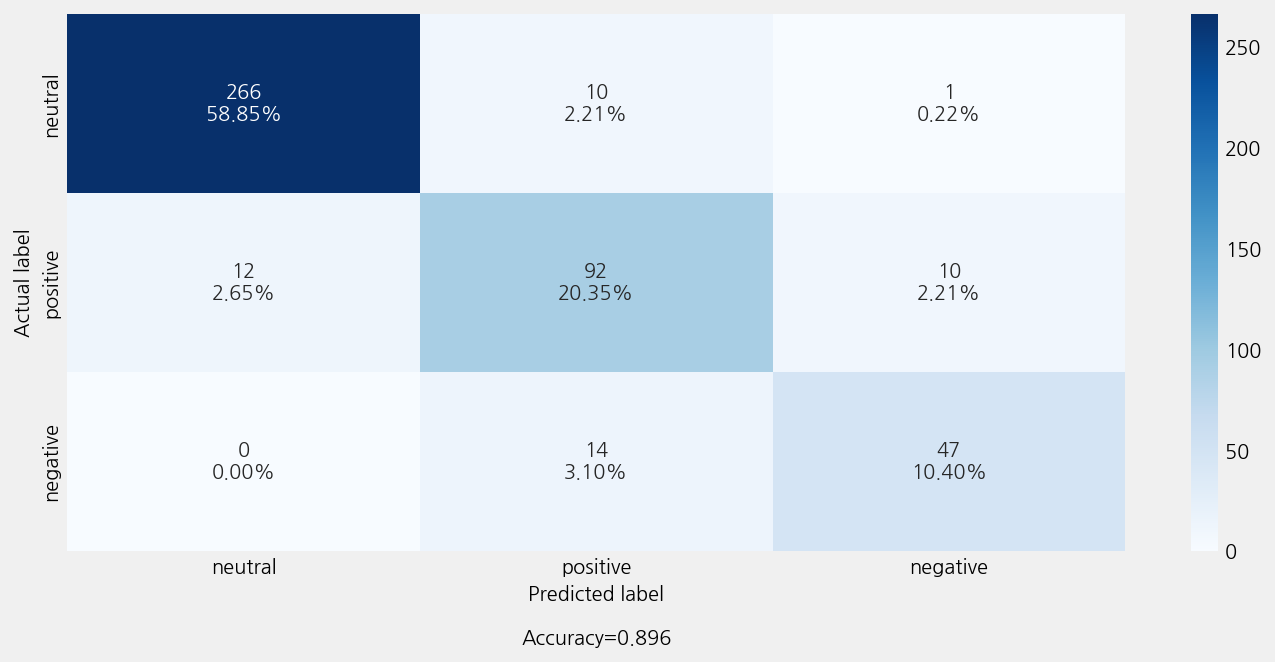

In [3]:
ds_cfg = eKonf.compose('dataset')
ds_cfg.name = 'financial_phrasebank'
ds_cfg.path.cache.uri = 'https://github.com/entelecheia/ekorpkit-book/raw/main/assets/data/financial_phrasebank.zip'
ds_cfg.data_dir = ds_cfg.path.cached_path
ds_cfg.verbose = False

overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=finbert',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = 'fomc_finbert'
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['eval']
# model_cfg._method_ = ['train', 'eval']
finbert_model = eKonf.instantiate(model_cfg)

In [6]:
model_cfg._method_ = []
cfg = eKonf.compose(config_group='pipeline')
cfg.name = 'fomc_sent_sentiments'
cfg.data_dir = data_dir
cfg.data_file = "fomc_sents.parquet"
cfg._pipeline_ = ['predict']
cfg.predict.model = model_cfg
cfg.predict.output_dir = data_dir
cfg.predict.output_file = f'{cfg.name}_finbert.parquet'
fomc_sent_sentiments_finbert = eKonf.instantiate(cfg)
fomc_sent_sentiments_finbert.head()

  0%|          | 0/653468 [00:00<?, ?it/s]

  0%|          | 0/20426 [00:00<?, ?it/s]

,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,...,recent_rate,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id,pred_labels,raw_preds,pred_probs
0,0,The Secretary reported that advices of the ele...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,3.0,1993-02-18,0.0,3.0,47,29,0,neutral,"[2.2915966510772705, -0.9586986899375916, -2.4...",0.955035
1,0,"By unanimous vote, the Committee elected the f...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,3.0,1993-02-18,0.0,3.0,73,35,0,neutral,"[1.692587971687317, -0.2049560397863388, -2.53...",0.858684
2,0,"By unanimous vote, William J. McDonough, Marga...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,3.0,1993-02-18,0.0,3.0,74,37,0,neutral,"[1.8892569541931152, -0.3972317576408386, -2.6...",0.898655
3,0,"On January 15, 1993, the continuing rules, reg...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,3.0,1993-02-18,0.0,3.0,59,39,0,neutral,"[2.335063934326172, -1.0927255153656006, -2.45...",0.960805
4,0,Members were asked to indicate if they wished ...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,3.0,1993-02-18,0.0,3.0,25,39,1,neutral,"[2.3842966556549072, -1.327033519744873, -2.36...",0.967973


In [16]:
fomc_sent_sentiments_finbert = eKonf.load_data('fomc_sent_sentiments_finbert.parquet', data_dir)
fomc_sent_sentiments_finbert

,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,...,recent_rate,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id,pred_labels,raw_preds,pred_probs
0,0,The Secretary reported that advices of the ele...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,3.00,1993-02-18,0.0,3.00,47,29,0,neutral,"[2.2915966510772705, -0.9586986899375916, -2.4...",0.955035
1,0,"By unanimous vote, the Committee elected the f...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,3.00,1993-02-18,0.0,3.00,73,35,0,neutral,"[1.692587971687317, -0.2049560397863388, -2.53...",0.858684
2,0,"By unanimous vote, William J. McDonough, Marga...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,3.00,1993-02-18,0.0,3.00,74,37,0,neutral,"[1.8892569541931152, -0.3972317576408386, -2.6...",0.898655
3,0,"On January 15, 1993, the continuing rules, reg...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,3.00,1993-02-18,0.0,3.00,59,39,0,neutral,"[2.335063934326172, -1.0927255153656006, -2.45...",0.960805
4,0,Members were asked to indicate if they wished ...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,3.00,1993-02-18,0.0,3.00,25,39,1,neutral,"[2.3842966556549072, -1.327033519744873, -2.36...",0.967973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653463,2854,It will not have the word “somewhat” on line 3.,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,0.25,2015-01-28,0.0,0.25,10,287,2,neutral,"[2.3733553886413574, -1.3893874883651733, -2.2...",0.967620
653464,2854,Chair Yellen Yes Vice Chairman Dudley ...,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,0.25,2015-01-28,0.0,0.25,31,287,4,neutral,"[2.224238872528076, -0.893900990486145, -2.421...",0.948905
653465,2854,And let me confirm that the next meeting will ...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,0.25,2015-01-28,0.0,0.25,19,288,3,neutral,"[2.349479913711548, -1.391977071762085, -2.298...",0.967770
653466,2854,I believe box lunches are now available for pe...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,0.25,2015-01-28,0.0,0.25,33,288,4,neutral,"[2.311434030532837, -1.1415460109710693, -2.37...",0.960746


In [17]:
cfg = eKonf.compose('pipeline')
cfg._pipeline_ = ['aggregate_scores', 'replace', 'pivot', 'save_dataframe']
cfg.num_workers = 100
cfg.data.data_file = "fomc_sent_sentiments_finbert.parquet"
cfg.data.data_dir = data_dir
cfg.aggregate_scores.groupby = ['content_type', 'date']
cfg.aggregate_scores._method_ = 'classification'
cfg.replace.apply_to = 'content_type'
cfg.replace.rcParams.to_replace = {'fomc_': ''}
cfg.replace.rcParams.regex = True
cfg.pivot.index = 'date'
cfg.pivot.columns = 'content_type'
cfg.pivot.values = ['polarity_mean', 'polarity_diffusion', 'num_examples']
cfg.save_dataframe.output_dir = data_dir
cfg.save_dataframe.output_file = 'fomc_sentiment_finbert_next.parquet'
tone_data_finbert = eKonf.instantiate(cfg)
tone_data_finbert = eKonf.to_datetime(tone_data_finbert, _columns='date')
tone_data_finbert = tone_data_finbert.set_index('date')
eKonf.save_data(tone_data_finbert, 'fomc_tone_data_finbert.parquet', data_dir)

In [23]:
tone_data_finbert = eKonf.load_data('fomc_tone_data_finbert.parquet', data_dir)

cols = [
    'polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement',
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
]

tone_data_finbert =  tone_data_finbert[cols].copy()
tone_data_finbert.columns = tone_data_finbert.columns.str.replace('polarity', 'finbert')
tone_data_finbert

,finbert_mean_minutes,finbert_mean_press_conf,finbert_mean_speech,finbert_mean_statement,finbert_diffusion_minutes,finbert_diffusion_press_conf,finbert_diffusion_speech,finbert_diffusion_statement
date,,,,,,,,
1990-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-30,NaN,NaN,0.182338,NaN,NaN,NaN,0.239583,NaN
2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,0.262141,NaN,NaN,NaN,0.338889,NaN


## Predict sentiments with the T5

/opt/conda/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5.py:164: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


  0%|          | 0/1445 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3557: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and the tokenizer under the `as_target_tokenizer` context manager to prepare
your targets.

Here is a short example:

model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 2:   0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3557: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and the tokenizer under the `as_target_tokenizer` context manager to prepare
your targets.

Here is a short example:

model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


Running Epoch 1 of 2:   0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/57 [00:00<?, ?it/s]

{'eval_loss': 0.06258307859733529}


Generating outputs:   0%|          | 0/57 [00:00<?, ?it/s]

Accuracy:  0.9491150442477876
Precison:  0.9495910765330818
Recall:  0.9491150442477876
F1 Score:  0.9474806981643329
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.96      0.75      0.84        61
     neutral       0.97      1.00      0.98       277
    positive       0.90      0.94      0.92       114

    accuracy                           0.95       452
   macro avg       0.94      0.90      0.91       452
weighted avg       0.95      0.95      0.95       452



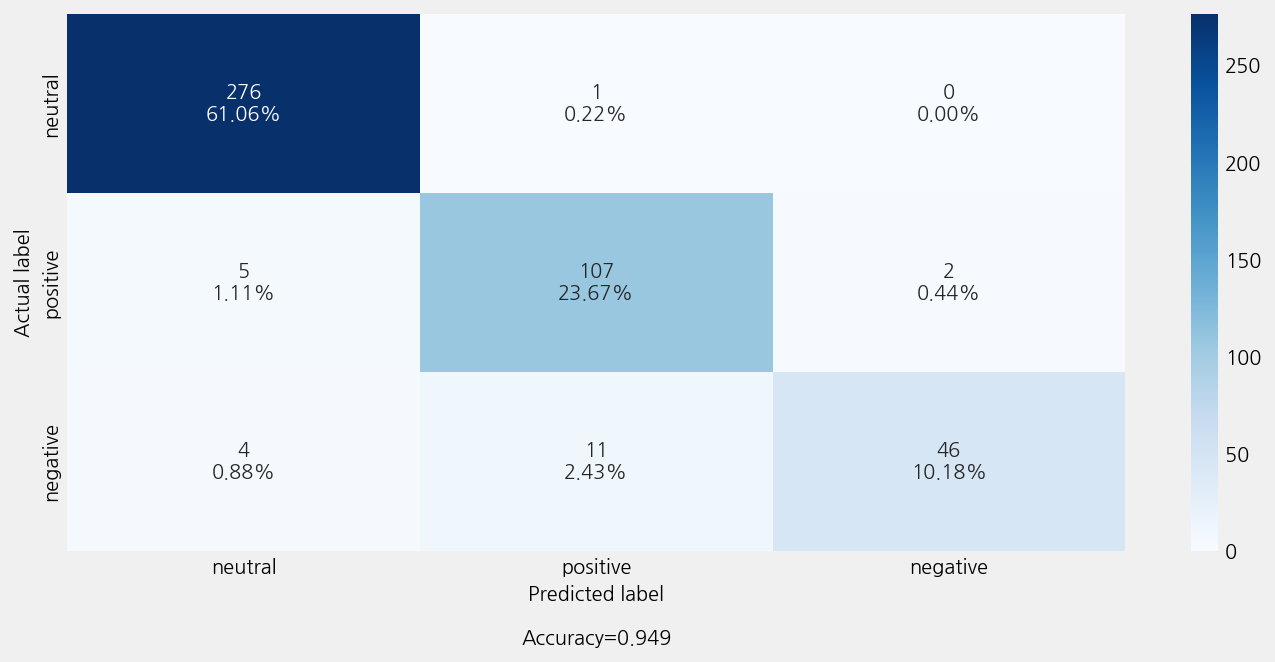

In [6]:
ds_cfg = eKonf.compose('dataset')
ds_cfg.name = 'financial_phrasebank'
ds_cfg.path.cache.uri = 'https://github.com/entelecheia/ekorpkit-book/raw/main/assets/data/financial_phrasebank.zip'
ds_cfg.data_dir = ds_cfg.path.cached_path
ds_cfg.verbose = False

overrides=[
    '+model/transformer=t5_classification_with_simple',
    '+model/transformer/pretrained=t5-base',
]
model_cfg = eKonf.compose('model/transformer=t5_classification_with_simple', overrides)
model_cfg.name = 'fomc_t5'
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 8
model_cfg.config.eval_batch_size = 8
model_cfg._method_ = ['train', 'eval']
# model_cfg._method_ = ['eval']
t5_model = eKonf.instantiate(model_cfg)

In [7]:
model_cfg._method_ = []
cfg = eKonf.compose(config_group='pipeline')
cfg.name = 'fomc_sent_sentiments'
cfg.data_dir = data_dir
cfg.data_file = "fomc_sents.parquet"
cfg._pipeline_ = ['predict']
cfg.predict.model = model_cfg
cfg.predict.output_dir = data_dir
cfg.predict.output_file = f'{cfg.name}_t5.parquet'
fomc_sent_sentiments_t5 = eKonf.instantiate(cfg)
fomc_sent_sentiments_t5.head()

Generating outputs:   0%|          | 0/81684 [00:00<?, ?it/s]

/opt/conda/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:3557: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and the tokenizer under the `as_target_tokenizer` context manager to prepare
your targets.

Here is a short example:

model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,...,recent_decision,recent_rate,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id,prefix,pred_labels
0,0,The Secretary reported that advices of the ele...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,0.0,3.0,1993-02-18,0.0,3.0,47,29,0,classification,neutral
1,0,"By unanimous vote, the Committee elected the f...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,0.0,3.0,1993-02-18,0.0,3.0,73,35,0,classification,neutral
2,0,"By unanimous vote, William J. McDonough, Marga...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,0.0,3.0,1993-02-18,0.0,3.0,74,37,0,classification,neutral
3,0,"On January 15, 1993, the continuing rules, reg...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,0.0,3.0,1993-02-18,0.0,3.0,59,39,0,classification,neutral
4,0,Members were asked to indicate if they wished ...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.0,...,0.0,3.0,1993-02-18,0.0,3.0,25,39,1,classification,neutral


In [21]:
cfg = eKonf.compose('pipeline')
cfg._pipeline_ = ['aggregate_scores', 'replace', 'pivot', 'save_dataframe']
cfg.num_workers = 100
cfg.data.data_file = "fomc_sent_sentiments_t5.parquet"
cfg.data.data_dir = data_dir
cfg.aggregate_scores.groupby = ['content_type', 'date']
cfg.aggregate_scores._method_ = 'classification_t5'
cfg.replace.apply_to = 'content_type'
cfg.replace.rcParams.to_replace = {'fomc_': ''}
cfg.replace.rcParams.regex = True
cfg.pivot.index = 'date'
cfg.pivot.columns = 'content_type'
cfg.pivot.values = ['polarity_diffusion', 'num_examples']
cfg.save_dataframe.output_dir = data_dir
cfg.save_dataframe.output_file = 'fomc_sentiment_t5_next.parquet'
tone_data_t5 = eKonf.instantiate(cfg)
tone_data_t5 = eKonf.to_datetime(tone_data_t5, _columns='date')
tone_data_t5 = tone_data_t5.set_index('date')
eKonf.save_data(tone_data_t5, 'fomc_tone_data_t5.parquet', data_dir)

In [22]:
tone_data_t5 = eKonf.load_data('fomc_tone_data_t5.parquet', data_dir)

cols = [
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
]

tone_data_t5 =  tone_data_t5[cols].copy()
tone_data_t5.columns = tone_data_t5.columns.str.replace('polarity', 't5')
tone_data_t5


,t5_diffusion_minutes,t5_diffusion_press_conf,t5_diffusion_speech,t5_diffusion_statement
date,,,,
1990-02-07,NaN,NaN,NaN,NaN
1990-03-27,NaN,NaN,NaN,NaN
1990-05-15,NaN,NaN,NaN,NaN
1990-07-03,NaN,NaN,NaN,NaN
1990-08-21,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-11-30,NaN,NaN,0.239583,NaN
2021-12-01,NaN,NaN,NaN,NaN
2021-12-02,NaN,NaN,0.250000,NaN
